# Data_Cleaning_Project

#### importing Libraries and loading

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/WHO-COVID-19-global-daily-data.csv')

#### Displaying Data Information

In [3]:
# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450720 entries, 0 to 450719
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      450720 non-null  object 
 1   Country_code       448842 non-null  object 
 2   Country            450720 non-null  object 
 3   WHO_region         450720 non-null  object 
 4   New_cases          207873 non-null  float64
 5   Cumulative_cases   450720 non-null  int64  
 6   New_deaths         152814 non-null  float64
 7   Cumulative_deaths  450720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.5+ MB
None


In [4]:
# Display first 5 rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  Date_reported Country_code         Country WHO_region  New_cases  \
0    2020-01-04           AF     Afghanistan        EMR        NaN   
1    2020-01-04           AL         Albania        EUR        NaN   
2    2020-01-04           DZ         Algeria        AFR        NaN   
3    2020-01-04           AS  American Samoa        WPR        0.0   
4    2020-01-04           AD         Andorra        EUR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         0.0                  0  
4                 0         NaN                  0  


#### Checking Dataset in detail

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date_reported             0
Country_code           1878
Country                   0
WHO_region                0
New_cases            242847
Cumulative_cases          0
New_deaths           297906
Cumulative_deaths         0
dtype: int64


In [6]:
# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [7]:
# Describe numerical columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
          New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.078730e+05      4.507200e+05  152814.000000       4.507200e+05
mean   3.740357e+03      1.941942e+06      46.401351       2.099982e+04
std    4.884882e+04      8.235867e+06     243.208622       8.480176e+04
min   -6.507900e+04      0.000000e+00   -3520.000000       0.000000e+00
25%    3.000000e+00      5.635000e+03       0.000000       3.500000e+01
50%    6.200000e+01      5.228700e+04       2.000000       6.700000e+02
75%    6.910000e+02      6.155348e+05      15.000000       7.574000e+03
max    6.966046e+06      1.034368e+08   44047.000000       1.218325e+06


In [8]:
# Check data types of each column
print("\nColumn Data Types:")
print(df.dtypes)


Column Data Types:
Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object


#### Visualization

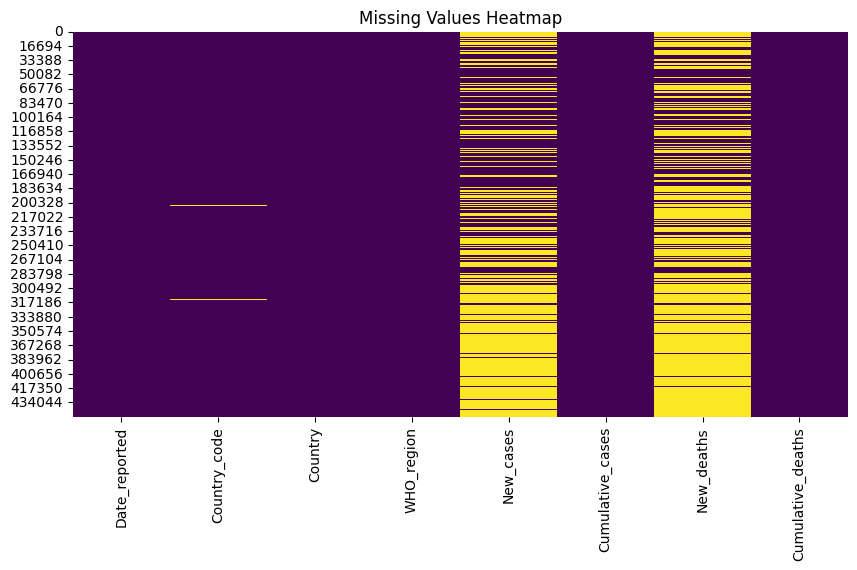

In [9]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

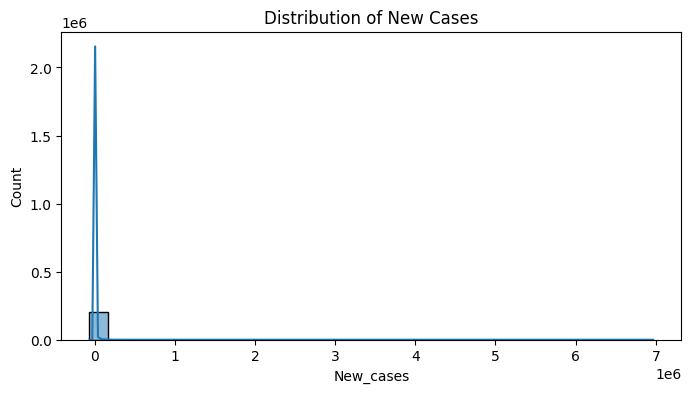

In [10]:
# Visualizing distribution of new cases
plt.figure(figsize=(8, 4))
sns.histplot(df["New_cases"], bins=30, kde=True)  # Updated column name
plt.title("Distribution of New Cases")
plt.show()

#### Handling Missing Values

In [11]:
df = df.copy()  # Making a copy of the DataFrame

In [12]:
# Fill missing Country_code with "Unknown"
df.loc[:, "Country_code"] = df["Country_code"].fillna("Unknown")

In [13]:
# Fill missing New_cases and New_deaths with 0
df.loc[:, "New_cases"] = df["New_cases"].fillna(0)
df.loc[:, "New_deaths"] = df["New_deaths"].fillna(0)

In [14]:
print(df.isnull().sum())

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


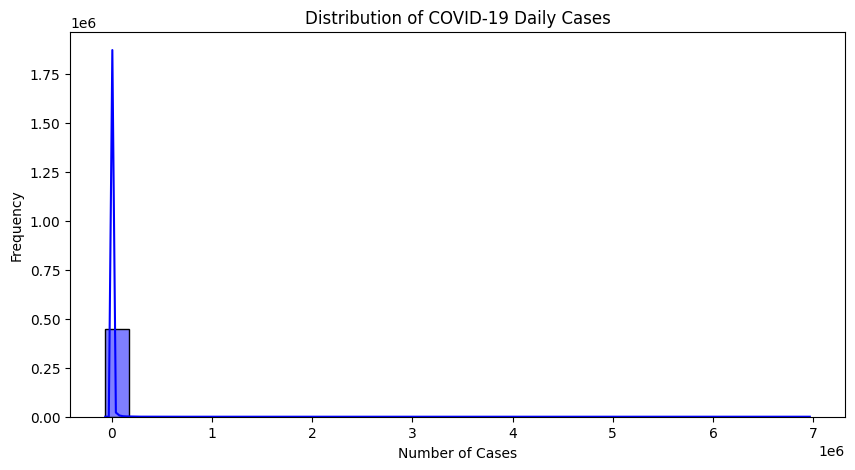

In [15]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot histogram for new cases
sns.histplot(df["New_cases"], bins=30, kde=True, color='blue')

# Titles and labels
plt.title("Distribution of COVID-19 Daily Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [17]:
# Load the dataset
df_raw = pd.read_csv('../data/raw/WHO-COVID-19-global-daily-data.csv')

<Figure size 1000x500 with 0 Axes>

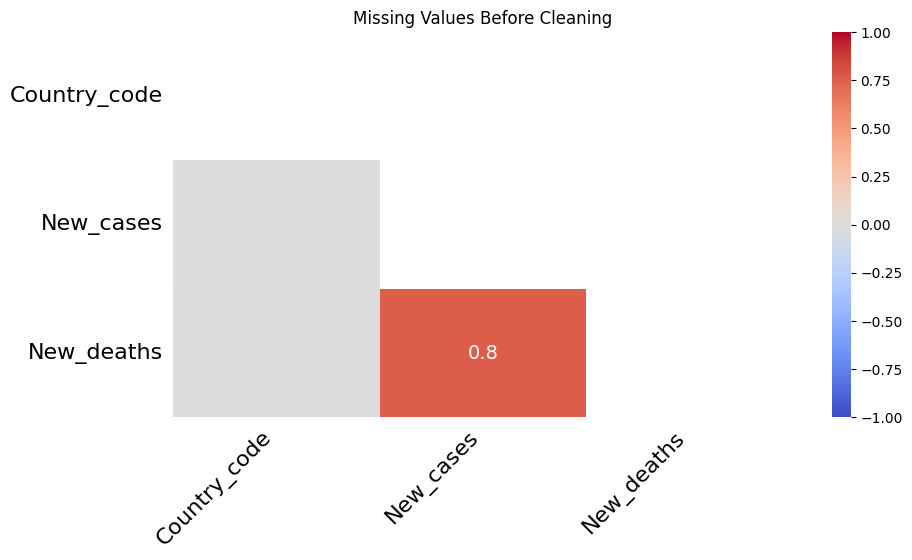

In [18]:
import missingno as msno

# Visualizing missing values before cleaning
plt.figure(figsize=(10, 5))
msno.heatmap(df_raw, cmap="coolwarm", figsize=(10,5))
plt.title("Missing Values Before Cleaning")
plt.show()

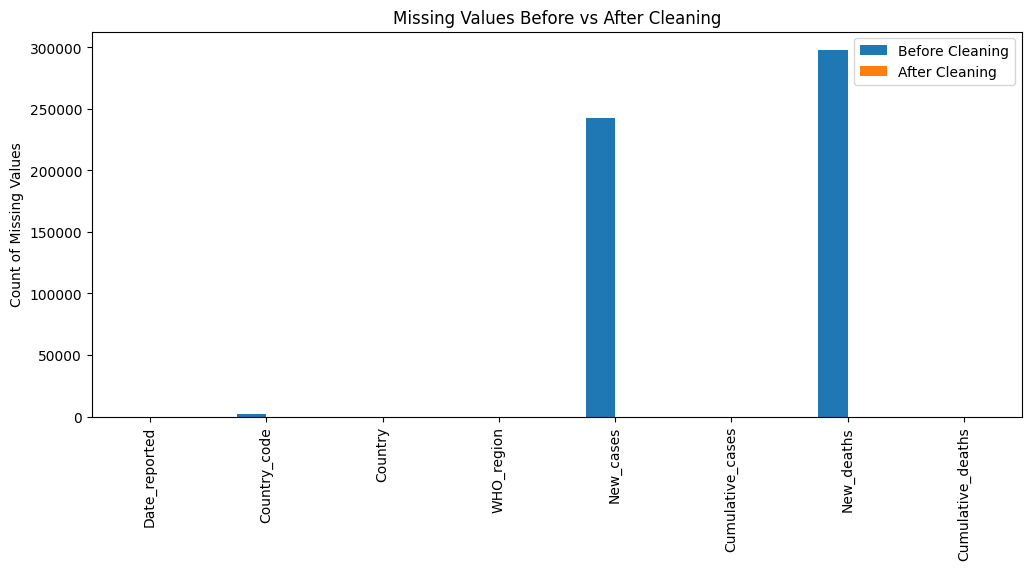

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Count missing values before and after
missing_before = df_raw.isnull().sum()
missing_after = df.isnull().sum()

# Create DataFrame for comparison
missing_df = pd.DataFrame({"Before Cleaning": missing_before, "After Cleaning": missing_after})

# Plot
missing_df.plot(kind="bar", figsize=(12,5), title="Missing Values Before vs After Cleaning")
plt.ylabel("Count of Missing Values")
plt.show()

# Cleaned Dataset

In [20]:
# Save cleaned dataset
cleaned_path = "../data/processed/WHO-COVID-19-cleaned.csv"  # Adjust path if needed
df.to_csv(cleaned_path, index=False)

print("Data cleaning complete! Cleaned file saved at:", cleaned_path)

Data cleaning complete! Cleaned file saved at: ../data/processed/WHO-COVID-19-cleaned.csv
